# Module 5 Assignment

# Problem 1

From a random sample from Maricopa County, 385 out of 500 indicated that they were in favor of increasing the highway speed limit to 75mph. In Pima County, 267 people were in favor of increasing the speed limit, out of a random sample of 400.

**Part A)** 

Does there appear to be a difference in the amount of support for increasing the speed limit between the residents of the two counties? To answer this, construct a 95% confidence interval for $p_{1}-p_{2}$, the difference in the two proportions. As this is an interval of "plausible values" for $p_{1}-p_{2}$, if it contains the value $0$, it "seems plausible" that $p_{1}=p_{2}$ and we would say that there does not appear to be a difference based on the particular observations given here.

Save the left endpoint of your confidence interval as `p1.a.lower` and save the right endpoint as `p1.a.upper`. (Note: The "p1.a" in each of these variables refers to the fact that this is part a of Problem 1. It does not refer to the first population proportion.)

In [2]:
# Replace each NA with your answers after you work out code to solve the problem below.
p1.a.lower = NA
p1.a.upper = NA
p1.a.are_different = NA #Replace this NA with either TRUE or FALSE

# your code here
x1 = 385; n1 = 500
x2 = 267; n2 = 400

p1 = x1/n1
p2 = x2/n2
diff = p1 - p2
se = sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
z = qnorm(0.975)

p1.a.lower = diff - z*se
p1.a.upper = diff + z*se
p1.a.are_different = (p1.a.lower > 0) | (p1.a.upper < 0)

p1.a.lower
p1.a.upper
p1.a.are_different

[1] 0.04340589

[1] 0.1615941

[1] TRUE

**Part b)** The "confidence level" for part (a) was $0.95$. Give any confidence level that will change your conclusion from part (a). 

(Note: Doing this is real life with your data is an unethical approach known as "data snooping". Don't do it!)

In [3]:
# Replace the NA with your answer after you work out code to solve the problem below.
new.level = 0.9994

# Question 2

You are proctoring a test for class A and decide to measure the length of time it takes each person to finish. These times are given below.

In [4]:
# Run this cell
times.A = c(44.84, 44.17, 38.2, 45.2, 38.83, 
            47.38, 42.36, 38.1, 36.51, 35.1, 
            35.52, 33.43, 44.86, 43.49, 39.05)

Typing `order(times.A)` will give a vector of rankings for each of the 15 values in "times.A", with 1 being the smallest and 15 being the largest.

Typing `times.A[order(times.A)]` will order the vector "times.A" and will return

    33.43 35.1 35.52 36.51 38.1 38.2 38.83 39.05 42.36 43.49 44.17 44.84 44.86 45.2 47.38
    
The value $33.43$ is $1/15$ of the data set. Note that $1/15 \approx 0.067$ so we can say that approximately 6.7\% of the data is at or below $33.43$.  

For the theoretical $N(0,1)$ distribution, the critical value that captures 1/15 of the area under the pdf to the left is <code>qnorm(1/15)</code>. Running this command in R gives us approximately $-1.50$. Critical values that divide up a distribution into pieces of equal area, i.e. qnorm(1/15), qnorm(2/15), ..., qnorm(14/15) are known as <b>quantiles</b>.

Plotting $33.43$ against qnorm(1/15), $35.1$ against qnorm(2/15), $35.52$ against qnorm(3/13), et. cetera is known as a <b>quantile-quantile plot</b>. If the data are a sample from a $N(0,1)$ distribution, we would expect this plot to follow the line $y=x$. If the data are a sample from a different normal distribution, we expect this plot to still look like a line even though the slope and y-intercept might be different from 1 and 0, respectively.

Run the next cell to make a quantile-quantile plot for the data against the $N(0,1)$ distribution and to fit a line.

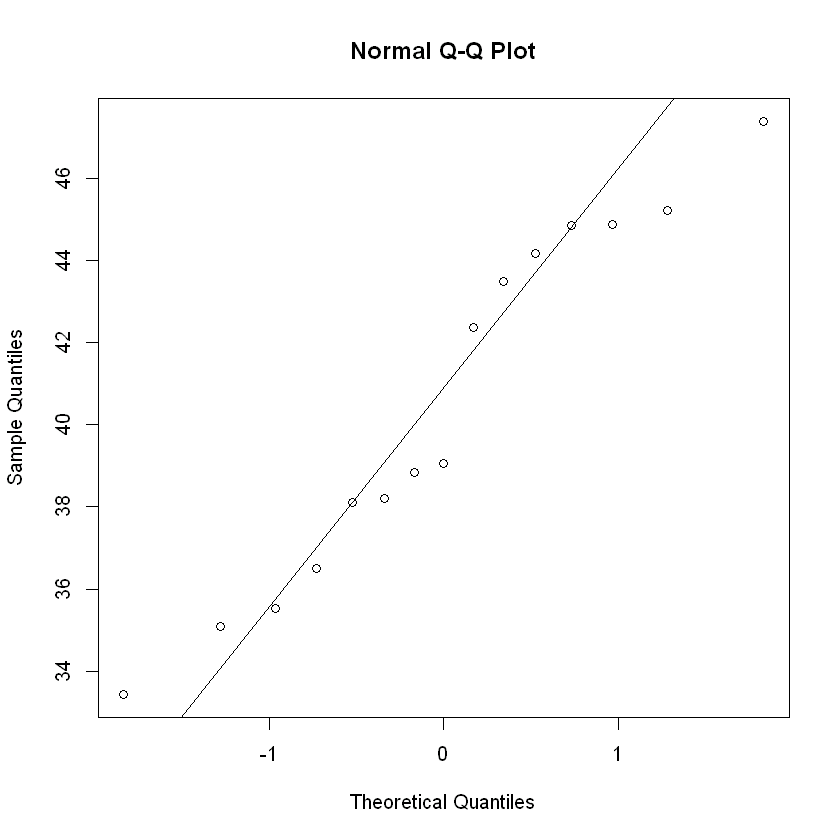

In [5]:
# Run this cell
qqnorm(times.A)
qqline(times.A)

Do you see a linear relationship? It is difficult to say for sure. Sampling variability is always going to keep us from getting a perfect line even if the data are indeed from a normal distribution. This is especially apparent for small samples as we have here. Reading "qq-plots" takes practice. It might be a fun exercise for you to repeatedly simulate data sets of size 15 that are known to be from a normal distribution, using the R command

<code>my.simulated.data = rnorm(15,some_mean_here, some_stand_dev_here)</code>

For each sample you could then make a qq-plot. Studying the plots will give you some idea of what you should expect to see when your sample is really from a normal distribution.

It is our opinion that the qq-plot from the previous cell lends support to the assumption that the test times distribution might be normal. We will move forward under this assumption.

**Part A)** Calculate the 95% confidence interval for $\sigma_A$, the true standard deviation for the time it takes to take the test. Define this interval such that 2.5% of the area is lower than the lower bound and 2.5% of the area is above the upper bound. Save the bounds of your confidence interval as `p2.a.lower` and `p2.a.upper`. Round your answers to 2 decimal places.

In [6]:
# Placeholders for your answers
p2.a.lower = NA
p2.a.upper = NA

# your code here
s2 = (sd(times.A))^2
df = length(times.A) -1
qchisq(0.975, df = df)
qchisq(0.025, df = df)

lower = sqrt((df)*s2 / qchisq(0.975, df = df))
upper = sqrt((df)*s2 / qchisq(0.025, df = df))
p2.a.lower = round(lower, 2)
p2.a.upper = round(upper, 2)
p2.a.lower
p2.a.upper

[1] 26.11895

[1] 5.628726

[1] 3.21

[1] 6.91

**Part B)** Calculate the upper bound of the 95% confidence interval for $\sigma_A^2$ where the lower bound of the **final** confidence interval is $0$. Save your answer as `p2.b.upper`. Round your answer to two decimal places.

In [7]:
# Placeholder for your answer
p2.b.upper = NA

# your code here
n = length(times.A)
df = n - 1
s2 = var(times.A)

p2.b.upper = (df * s2) / qchisq(0.05, df = df)
p2.b.upper = round(sqrt(p2.b.upper), 2)
p2.b.upper

[1] 6.4

**Part C)** You give the same test to a different group of students, called class B, and record the times it takes each of them to finish. Assume that each time from class B is also normally distributed, but a with (potentially) different underlying mean and variance. Note that class A and class B have different numbers of students. 

Calculate the 95% confidence interval for the ratio of variances $\sigma_A^2/\sigma_B^2$ such that 2.5% of the area of the distribution is below the lower bound and 2.5% of the area is above the upper bound. Save your answers as `p2.c.lower` and `p2.c.upper`. Round your answers to two decimal places.

In [8]:
times.B = c(35.22, 45.46, 34.32, 51.75, 39, 52.07, 
            39.52, 36.17, 42.15, 42.16, 31.92, 48.32,
            35.28, 44.01, 44.97, 42.83, 41.29, 43.19
)

In [9]:
p2.c.lower = NA
p2.c.upper = NA

# your code here
nA = length(times.A)
nB = length(times.B)
d1 = nA - 1
d2 = nB - 1
s2A = var(times.A)
s2B = var(times.B)
ratio = s2A / s2B

alpha = 0.05
f_lower = qf(alpha/2, d1, d2)
f_upper = qf(1 - alpha/2, d1, d2)
p2.c.lower = ratio / f_upper
p2.c.upper = ratio / f_lower
p2.c.lower = round(p2.c.lower, 2)
p2.c.upper = round(p2.c.upper, 2)
p2.c.lower
p2.c.upper

[1] 0.21

[1] 1.68

**Part D)** Based on your results to **part C**, is it plausible that $\sigma_A^2 = \sigma_B^2$ at the 95% confidence level? Enter the boolean value `TRUE` if it is plausible, or `FALSE` if it is not plausible. Save your answer as `p2.d`.

In [10]:
# PLaceholder for answer. Ignore "Code here". No code is required
p2.d = TRUE